**Nama** : Imamuzzaki Abu Salam

**Bergabung** : 04 Agustus 2019

**Asal** : Kabupaten Sragen, Jawa Tengah

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
# mengunduh dataset dari dicoding
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-04-30 17:40:32--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  9.05MB/s    in 47s     

2021-04-30 17:41:20 (6.62 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# melakukan ekstraksi pada file zip
import zipfile
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images/'
data_dir = base_dir

In [ ]:
import os

In [ ]:
mypath= data_dir

# menghapus file di dataset yang yang tidak kita butuhkan
directory = os.path.realpath(mypath)
for subdir, dirs, files in os.walk(directory):
     for filename in files:
          if not filename.lower().endswith('.png'):
            subdirectoryPath = os.path.relpath(subdir, directory) 
            file1 = os.path.join(directory,subdirectoryPath)
            filePath = os.path.join(file1, filename)  
            os.remove(filePath)

In [ ]:
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        tag.append(path.split('/')[-1])        
        file_name.append(name)

In [ ]:
import pandas as pd

In [ ]:
# memasukan variabel yang sudah dikumpulkan pada looping di atas menjadi sebuah dataframe agar rapih
df = pd.DataFrame({"path":full_path,'file_name':file_name,"tag":tag})
df.groupby(['tag']).size()

tag
paper       712
rock        726
scissors    750
dtype: int64

In [ ]:
#cek sample datanya
df.head()

,path,file_name,tag
0,/tmp/rockpaperscissors/rps-cv-images/paper/nPE...,nPEUpKKphLYH3Bjy.png,paper
1,/tmp/rockpaperscissors/rps-cv-images/paper/pRZ...,pRZml1c5DSIzYVxA.png,paper
2,/tmp/rockpaperscissors/rps-cv-images/paper/5Iz...,5Iz9WPYz1C3PKWxj.png,paper
3,/tmp/rockpaperscissors/rps-cv-images/paper/zXY...,zXY93m62vUNIH4a0.png,paper
4,/tmp/rockpaperscissors/rps-cv-images/paper/Mq8...,Mq8Ym2axOJVIthiP.png,paper


In [ ]:
#load library untuk train test split
from sklearn.model_selection import train_test_split

In [ ]:
#variabel yang digunakan pada pemisahan data ini
X= df['path']
y= df['tag']

In [ ]:
# split dataset awal menjadi data train dan test
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.40, random_state=300)

In [ ]:
# menyatukan kedalam masing-masing dataframe

df_tr = pd.DataFrame({'path':X_train
              ,'tag':y_train
             ,'set':'train'})

df_val = pd.DataFrame({'path':X_val
              ,'tag':y_val
             ,'set':'validation'})

In [ ]:
print('train size', len(df_tr))
print('val size', len(df_val))

train size 1312
val size 876


In [ ]:
# melihat proporsi pada masing masing set apakah sudah ok atau masih ada yang ingin diubah
df_all = df_tr.append([df_val]).reset_index(drop=1)

print('===================================================== \n')
print(df_all.groupby(['set','tag']).size(),'\n')

print('===================================================== \n')

#cek sample datanya
df_all.sample(3)


set         tag     
train       paper       424
            rock        441
            scissors    447
validation  paper       288
            rock        285
            scissors    303
dtype: int64 




,path,tag,set
1472,/tmp/rockpaperscissors/rps-cv-images/rock/RkKc...,rock,validation
1708,/tmp/rockpaperscissors/rps-cv-images/rock/hAcc...,rock,validation
829,/tmp/rockpaperscissors/rps-cv-images/paper/vPv...,paper,train


In [ ]:
# menghapus folder dataset jika diperlukan
!rm -rf dataset/

In [ ]:
import shutil
from tqdm.notebook import tqdm as tq

In [ ]:
datasource_path = mypath
dataset_path = "dataset/"

In [ ]:
for index, row in tq(df_all.iterrows()):
    
    #detect filepath
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['tag'],row['image'].split('.')[0])            
    
    #make folder destination dirs
    if os.path.exists(os.path.join(dataset_path,row['set'],row['tag'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['tag']))
    
    #define file dest
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['tag'],destination_file_name)
    
    #copy file from source to dest
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

In [ ]:
# Define Input Parameters
dim = (150, 150)
# dim = (456, 456)
channel = (3, )
input_shape = dim + channel

#batch size
batch_size = 16

#Epoch
epoch = 10



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1. / 255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

In [ ]:
# binary = [1,0,0,0,0] [0,1,0,0,0] [0,0,1,0,0] [0,0,0,1,0] [0,0,0,0,1]
# categorical = 1,2,3,4,5

train_generator = train_datagen.flow_from_directory('dataset/train/',
                                                    target_size=dim,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

val_generator = val_datagen.flow_from_directory('dataset/validation/',
                                                target_size=dim,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True)

num_class = val_generator.num_classes
labels = train_generator.class_indices.keys()

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
print(labels)

dict_keys(['paper', 'rock', 'scissors'])


In [ ]:
def tf_data_generator(generator, input_shape):
    num_class = generator.num_classes
    tf_generator = tf.data.Dataset.from_generator(
        lambda: generator,
        output_types=(tf.float32, tf.float32),
        output_shapes=([None
                        , input_shape[0]
                        , input_shape[1]
                        , input_shape[2]]
                       ,[None, num_class])
    )
    return tf_generator

In [ ]:
train_data = tf_data_generator(train_generator, input_shape)
val_data = tf_data_generator(val_generator, input_shape)

In [ ]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Flatten, Dense

In [ ]:
model = Sequential()
model.add(Conv2D(128, (3, 3), padding='same', input_shape=input_shape))

model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_class))
model.add(Activation('softmax'))

# Compile the model
print('Compiling Model.......')
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Compiling Model.......


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 128)     3584      
_________________________________________________________________
activation (Activation)      (None, 150, 150, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 148, 148, 32)      36896     
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 74, 74, 64)        1

In [ ]:
from tensorflow.keras.applications import MobileNetV2

# get base models
base_model = MobileNetV2(
    input_shape=input_shape,
    include_top=False,
    weights='imagenet',
    classes=num_class,
)

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras import layers,Sequential
from tensorflow.keras.models import Model

In [ ]:
#Adding custom layers
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1024, activation="relu")(x)

predictions = layers.Dense(num_class, activation="softmax")(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 75, 75, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 75, 75, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 75, 75, 32)   0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [ ]:
# Compile the model
print('Compiling Model.......')
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Compiling Model.......


In [ ]:
!pip install -U --pre efficientnet

     |████████████████████████████████| 51kB 7.6MB/s 


In [ ]:
from efficientnet.tfkeras import EfficientNetB1

In [ ]:
# get base models
base_model = EfficientNetB1(
    input_shape=input_shape,
    include_top=False,
    weights='noisy-student',
    classes=num_class,
)

27017216/27010080 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras import layers,Sequential
from tensorflow.keras.models import Model

In [ ]:
#Adding custom layers
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(1024, activation="relu")(x)

predictions = layers.Dense(num_class, activation="softmax")(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 75, 75, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 75, 75, 32)   128         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 75, 75, 32)   0           stem_bn[0][0]                    
____________________________________________________________________________________________

In [ ]:
# Compile the model
print('Compiling Model.......')
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Compiling Model.......


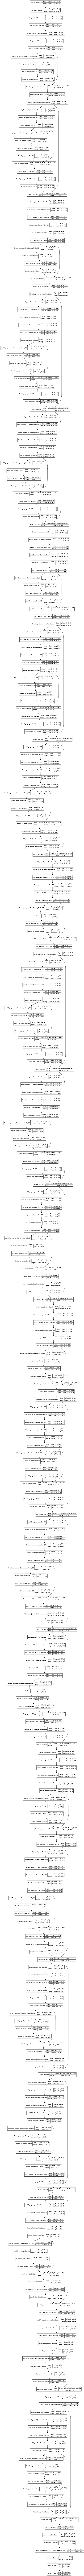

In [ ]:
model_viz = tf.keras.utils.plot_model(model,
                          to_file='model.png',
                          show_shapes=True,
                          show_layer_names=True,
                          rankdir='TB',
                          expand_nested=True,
                          dpi=55)
model_viz

In [ ]:
EPOCH = 4

In [ ]:
history = model.fit(x=train_data,
        steps_per_epoch=len(train_generator),
        epochs=EPOCH,
        validation_data=val_data,
        validation_steps=len(val_generator), 
        shuffle=True,
        verbose = 1)

Epoch 1/4
82/82 [==============================] - 71s 330ms/step - loss: 0.3684 - accuracy: 0.8518 - val_loss: 0.0299 - val_accuracy: 0.9943
Epoch 2/4
82/82 [==============================] - 24s 295ms/step - loss: 0.1593 - accuracy: 0.9576 - val_loss: 0.0605 - val_accuracy: 0.9874
Epoch 3/4
82/82 [==============================] - 24s 298ms/step - loss: 0.0461 - accuracy: 0.9831 - val_loss: 0.0383 - val_accuracy: 0.9886
Epoch 4/4
82/82 [==============================] - 24s 298ms/step - loss: 0.0635 - accuracy: 0.9746 - val_loss: 0.0069 - val_accuracy: 0.9977


In [ ]:
history.history['loss']

[0.22363655269145966,
 0.13699176907539368,
 0.0627831444144249,
 0.0683065876364708]

In [ ]:
history.history['accuracy']

[0.9298780560493469,
 0.9664633870124817,
 0.9809451103210449,
 0.9778963327407837]

In [ ]:
from matplotlib import pyplot as plt

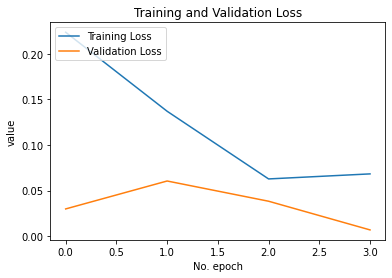

In [ ]:
# Plot history: MAE
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

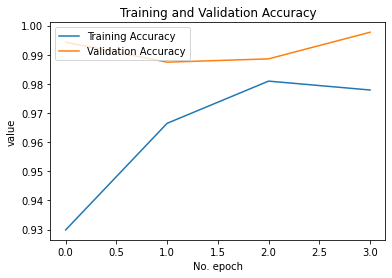

In [ ]:
# Plot history: MSE
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
import os

In [ ]:
MODEL_BASE_PATH = "model"
PROJECT_NAME = "medium_project"
SAVE_MODEL_NAME = "model.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)

if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))
    
print('Saving Model At {}...'.format(save_model_path))
model.save(save_model_path,include_optimizer=False)    
    

Saving Model At model/medium_project/model.h5...


In [ ]:
loss, acc = model.evaluate(val_data,steps=len(val_generator),verbose=0)
print('Accuracy on training data: {:.4f} \nLoss on training data: {:.4f}'.format(acc,loss),'\n')
 
loss, acc = model.evaluate(val_data,steps=len(val_generator),verbose=0)
print('Accuracy on test data: {:.4f} \nLoss on test data: {:.4f}'.format(acc,loss),'\n')    

Accuracy on training data: 1.0000 
Loss on training data: 0.0011 

Accuracy on test data: 0.9977 
Loss on test data: 0.0034 



In [ ]:
import requests
from io import BytesIO

from PIL import Image
import numpy as np

In [ ]:
# Parameters
input_size = (150,150)

#define input shape
channel = (3,)
input_shape = input_size + channel

#define labels
# labels = ['paper', 'rock', 'scissors']
labels = ['kertas', 'batu', 'gunting']

In [ ]:
def preprocess(img,input_size):
    nimg = img.convert('RGB').resize(input_size, resample= 0)
    img_arr = (np.array(nimg))/255
    return img_arr

def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
# ada 2 cara load model, jika cara pertama berhasil maka bisa lasngusng di lanjutkan ke fungsi prediksi

MODEL_PATH = 'model/medium_project/model.h5'
model = load_model(MODEL_PATH,compile=False)

In [ ]:
# read image
im = Image.open('/content/dataset/validation/scissors/1UojLz4CrT2G1Eo5.png')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

print( labels[np.argmax(y)], np.max(y) )

In [ ]:
y

array([[0., 0., 1.]], dtype=float32)

In [ ]:
print( labels[np.argmax(y)], np.max(y) )

In [ ]:
# read image
im = Image.open('/content/dataset/validation/rock/1UXuUYJ4rVj2eSvt.png')
X = preprocess(im,input_size)
X = reshape([X])
y = model.predict(X)

print( labels[np.argmax(y)], np.max(y) )

batu 1.0


Saving batu.jpeg to batu.jpeg
batu 0.9998374


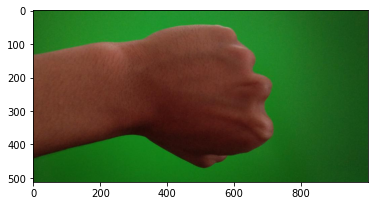

In [ ]:
# Nampilin Untuk widget upload file
from google.colab import files
import matplotlib.pyplot as plt
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  # read image
  im = Image.open(path)
  imgplot = plt.imshow(im)
  X = preprocess(im,input_size)
  X = reshape([X])
  y = model.predict(X)

  print( labels[np.argmax(y)], np.max(y) )